In [1]:
#Librerias
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import cm as cm
from mpl_toolkits import mplot3d
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

In [2]:
##LIMPIEZA DE DATOS Y CREACIÓN DE DATAFRAME

In [3]:
movies = pd.read_csv('../Data_Proyect/Dataset/IMDb movies.csv', low_memory=False)
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
ratings = pd.read_csv('../Data_Proyect/Dataset/IMDb_ratings.csv', low_memory=False)
ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,13,9,26,65,104,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,7.7,724,7.9,8.0,65,139,288,170,42,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,7.9,265,7.8,8.0,63,29,61,61,31,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,6.4,194,9.4,10.0,176,0,2,2,1,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [7]:
titles = pd.read_csv('../Data_Proyect/Dataset/IMDb title_principals.csv', low_memory=False)
titles

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...
835508,tt9914942,6,nm3678448,writer,NaN,NaN
835509,tt9914942,7,nm9361716,writer,novel,NaN
835510,tt9914942,8,nm2262072,composer,NaN,NaN
835511,tt9914942,9,nm1966322,cinematographer,NaN,NaN


In [8]:
#uno los 3 dataframe en uno solo

In [9]:
moviesandtitles = pd.merge(left=movies,right=titles, left_on='imdb_title_id', right_on='imdb_title_id')
moviesandtitles

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,ordering,imdb_name_id,category,job,characters
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,4,nm0085156,director,NaN,NaN
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,NaN,NaN,NaN,7.0,7.0,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835489,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,6,nm3678448,writer,NaN,NaN
835490,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,7,nm9361716,writer,novel,NaN
835491,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,8,nm2262072,composer,NaN,NaN
835492,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,9,nm1966322,cinematographer,NaN,NaN


In [10]:
Peliculas = moviesandtitles = pd.merge(left=moviesandtitles,right=ratings, left_on='imdb_title_id', right_on='imdb_title_id')
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
2,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835489,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835490,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835491,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835492,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0


In [11]:
#elimino datos duplicados del dataframe

In [12]:
Peliculas.drop_duplicates('imdb_title_id')

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
14,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
24,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
34,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835445,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
835455,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
835465,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
835475,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [13]:
Peliculas.sort_values('title', inplace=True)
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
167628,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167631,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167630,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167629,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167627,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697690,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697689,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697688,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697686,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0


In [14]:
Peliculas.drop_duplicates('imdb_title_id', keep="last", inplace=True)
Peliculas.sort_index(inplace=True) 

In [15]:
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
11,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
20,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
24,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
36,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835454,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
835460,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
835473,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
835481,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [16]:
#elimino la columna Imdb_tittle_id
Peliculas = Peliculas.drop(['imdb_title_id'], axis=1)

In [17]:
#elimino todo lo que no usare
Peliculas.drop(['original_title', 'date_published', 'imdb_name_id', 'category', 'job', 'characters', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1', 'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'], axis = 'columns', inplace=True)

In [18]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85846 entries, 3 to 835492
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  ob

In [19]:
Peliculas.drop(['ordering'], axis = 'columns', inplace=True)

In [20]:
Peliculas.reset_index(level=0, inplace=True)

In [21]:
Peliculas.drop(['index'], axis = 'columns', inplace=True)

In [22]:
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0
3,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85841,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,6.0,26.0,NaN,NaN,6.2,11.0,5.7,11.0,5.0,2.0
85842,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.6,109.0,NaN,NaN,7.4,29.0,8.0,47.0,7.3,30.0
85843,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85844,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0


In [23]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [24]:
Peliculas.drop(['allgenders_0age_votes','allgenders_18age_votes','allgenders_30age_votes','allgenders_45age_votes'], axis = 'columns', inplace=True)

In [25]:
Peliculas.drop(['males_allages_votes','males_0age_votes','males_18age_votes','males_30age_votes','males_45age_votes'], axis = 'columns', inplace=True)

In [26]:
Peliculas.drop(['females_allages_votes','females_0age_votes','females_18age_votes','females_30age_votes','females_45age_votes'], axis = 'columns', inplace=True)

In [27]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [28]:
##DATAFRAME FINAL
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.2,7.0,5.9,5.6,6.7,6.0,7.3,5.9,5.7,4.5
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.1,6.0,6.2,6.0,6.2,6.2,NaN,5.9,6.2,6.6
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.9,NaN,5.5,5.9,6.2,5.7,NaN,5.8,5.8,6.8
3,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.1,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.0,8.0,7.0,7.0,7.0,7.2,7.0,7.0,7.3,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85841,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,5.3,6.0,5.6,5.3,5.2,6.0,NaN,6.2,5.7,5.0
85842,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.8,NaN,7.6,7.6,7.9,7.6,NaN,7.4,8.0,7.3
85843,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,6.0,NaN,1.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
85844,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,3.1,NaN,6.5,1.8,1.0,4.0,NaN,NaN,NaN,7.0


In [29]:
#CREO UNA COPIA DEL DATAFRAME PARA USARLA LUEGO
Peliculascopy = Peliculas

In [30]:
Peliculas.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
count,85846.000000,85846.000000,8.584600e+04,13305.000000,78251.000000,74057.000000,33358.000000,85140.000000,85836.000000,85766.000000,85845.000000,27410.000000,84381.000000,85834.000000,85745.000000,85765.000000,22117.000000,79326.000000,84902.000000,83048.000000
mean,100.350407,5.898579,9.494453e+03,55.896881,46.044012,27.479874,6.195051,6.011241,5.862828,5.678169,5.817099,6.221306,5.946301,5.817684,5.630131,6.039305,6.147308,6.321438,6.071089,6.022184
std,22.550865,1.234853,5.357709e+04,17.784874,178.519029,58.339544,1.849119,1.439624,1.279272,1.250527,1.247913,1.767543,1.463981,1.289092,1.263938,1.346087,1.878342,1.738790,1.454205,1.541844
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000,5.000000,5.300000,5.100000,5.000000,5.100000,5.000000,5.100000,5.100000,4.900000,5.300000,5.000000,5.500000,5.300000,5.200000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000,6.000000,6.200000,6.100000,5.900000,6.000000,6.000000,6.200000,6.000000,5.900000,6.300000,6.000000,6.500000,6.300000,6.200000
75%,108.000000,6.800000,1.767000e+03,69.000000,27.000000,23.000000,7.200000,7.000000,6.800000,6.600000,6.700000,7.200000,7.000000,6.700000,6.500000,7.000000,7.100000,7.400000,7.000000,7.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [32]:
genresmovie = split_multicolumn(Peliculas.genre)
movie_genres = genresmovie.sum().sort_values(ascending=False)

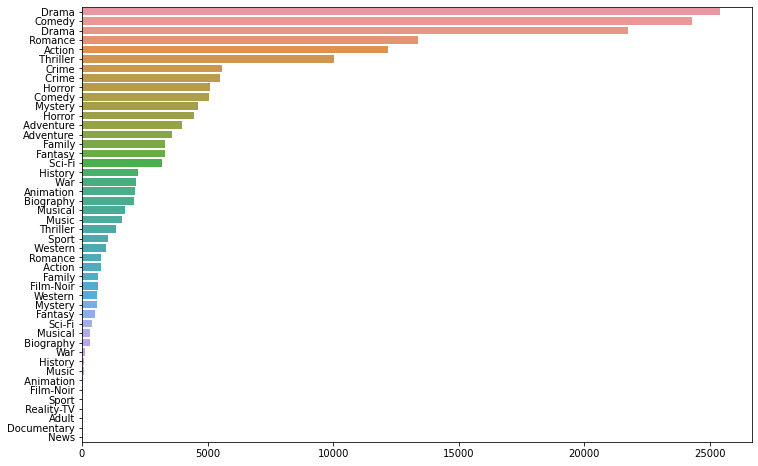

In [33]:
#Ranking de categorias
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

In [34]:
Peliculas.year.unique()

array(['1894', '1906', '1911', '1912', '1919', '1913', '1914', '1915',
       '1916', '1917', '1918', '1920', '1921', '1924', '1922', '1923',
       '1925', '1926', '1935', '1927', '1928', '1983', '1929', '1930',
       '1932', '1931', '1937', '1938', '1933', '1934', '1936', '1940',
       '1939', '1942', '1943', '1941', '1948', '1944', '2001', '1946',
       '1945', '1947', '1973', '1949', '1950', '1952', '1951', '1962',
       '1953', '1954', '1955', '1961', '1956', '1958', '1957', '1959',
       '1960', '1963', '1965', '1971', '1964', '1966', '1968', '1967',
       '1969', '1976', '1970', '1979', '1972', '1981', '1978', '2000',
       '1989', '1975', '1974', '1986', '1990', '2018', '1977', '1982',
       '1980', '1993', '1984', '1985', '1988', '1987', '2005', '1991',
       '2002', '1994', '1992', '1995', '2017', '1997', '1996', '2006',
       '1999', '1998', '2007', '2008', '2003', '2004', '2010', '2009',
       '2011', '2013', '2012', '2016', '2015', '2014', '2019', '2020',
      

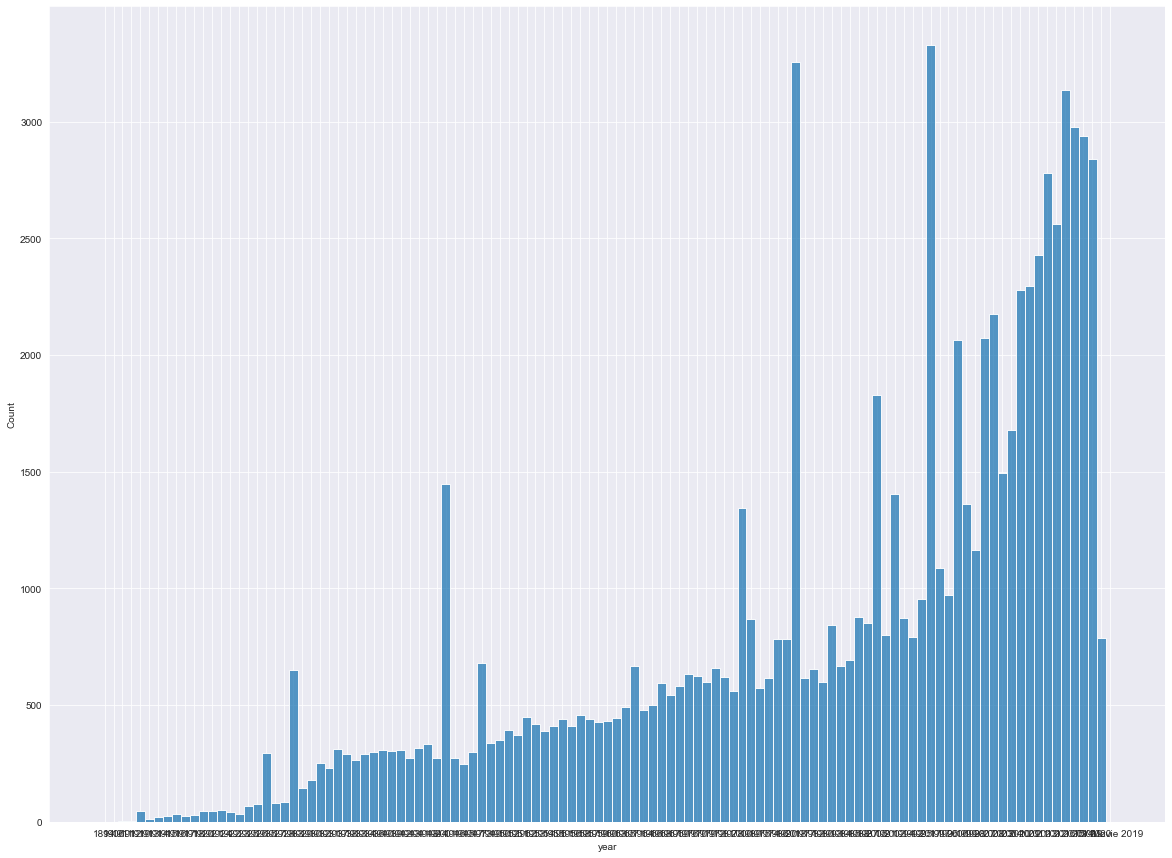

In [35]:
#Crecimieto de peliculas por año
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
sns.histplot(Peliculas.year,kde=False);

In [36]:
## Ratios Metascore

### Nota: El metascore es un ratio que evalua la calidad objetiva de las peliculas, no es una puntuación por critica

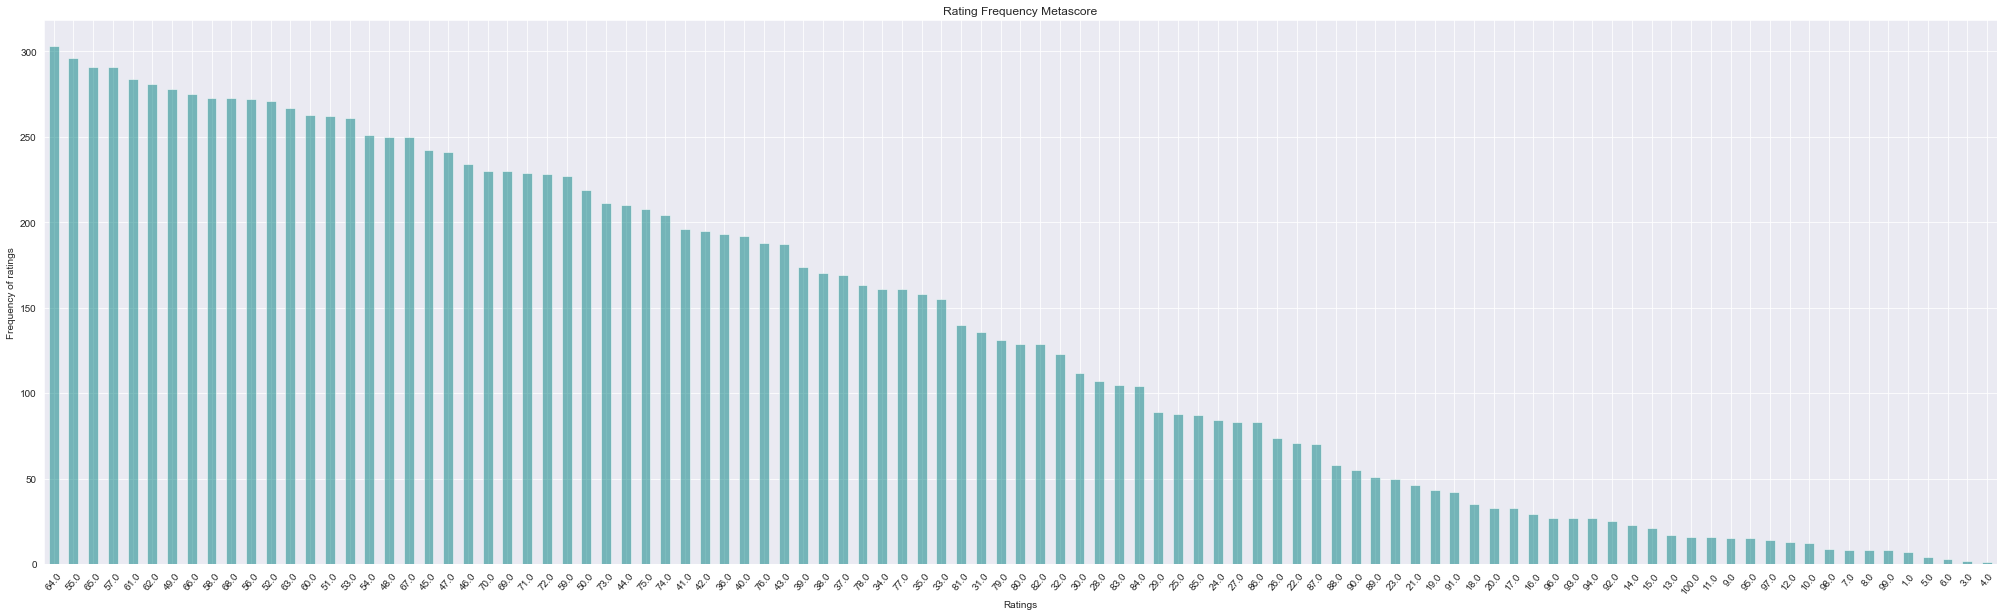

In [37]:
rating_freq = Peliculas['metascore'].value_counts()

plt.figure(figsize=(35,10))
rating_freq.plot.bar(color='teal',alpha=0.5)
plt.xticks(rotation=50)
plt.xlabel("Ratings")
plt.ylabel("Frequency of ratings")
plt.title("Rating Frequency Metascore")
plt.show()
plt.close()

In [38]:
## ¿Que idiomas en su versión original tiene mayor representación?

In [39]:
idiomas_traducidos = Peliculas.language.value_counts().head(20)
idiomas_traducidos

English             35935
French               3903
Spanish              2831
Japanese             2826
Italian              2731
Hindi                2106
German               1761
Turkish              1355
Russian              1345
English, Spanish     1108
Korean                976
Portuguese            917
English, French       857
Malayalam             839
Tamil                 831
Mandarin              780
Telugu                681
Cantonese             623
Persian               601
Swedish               563
Name: language, dtype: int64

<AxesSubplot:title={'center':'¿Que idiomas en su versión original tiene mayor representación?'}>

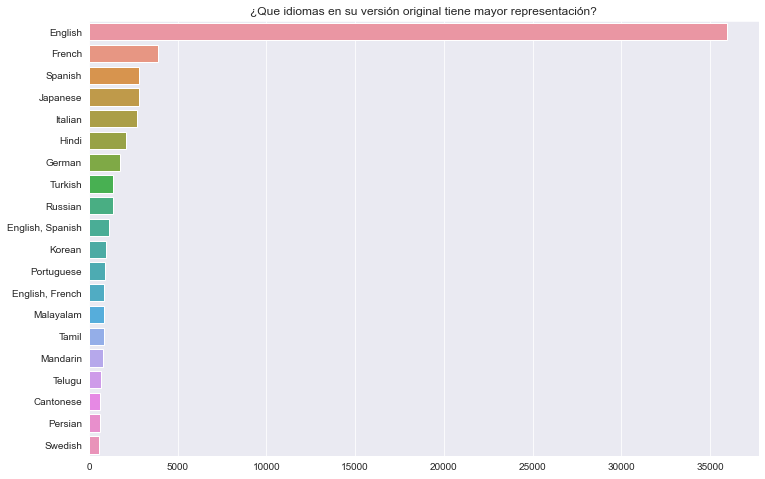

In [40]:
languages = Peliculas.language.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que idiomas en su versión original tiene mayor representación?')
sns.barplot(x=languages.values, y=languages.index)

In [41]:
Países_productores = Peliculas.country.value_counts().head(20)
Países_productores

USA             28505
India            6065
UK               4111
Japan            3077
France           3055
Italy            2444
Canada           1802
Germany          1396
Turkey           1351
Hong Kong        1239
Spain            1225
South Korea      1103
Russia            802
Australia         785
Soviet Union      766
Brazil            736
UK, USA           683
Mexico            655
Iran              642
Sweden            622
Name: country, dtype: int64

<AxesSubplot:title={'center':'¿Que país ha sido el que a producido más peliculas?'}>

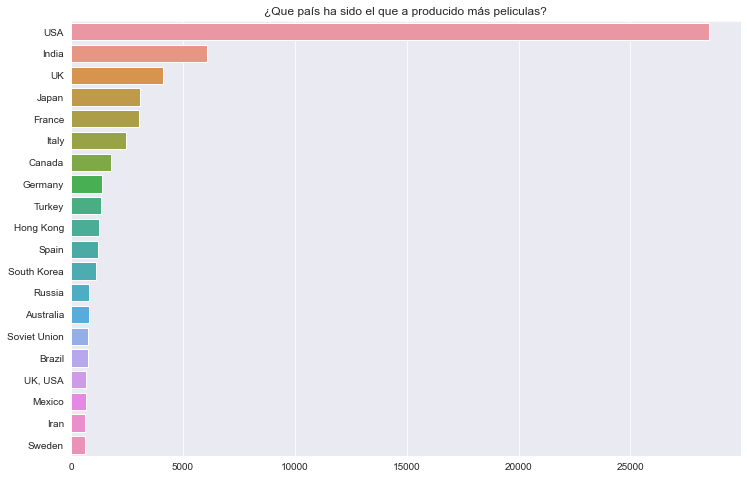

In [42]:
country = Peliculas.country.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que país ha sido el que a producido más peliculas?')
sns.barplot(x=country.values, y=country.index)

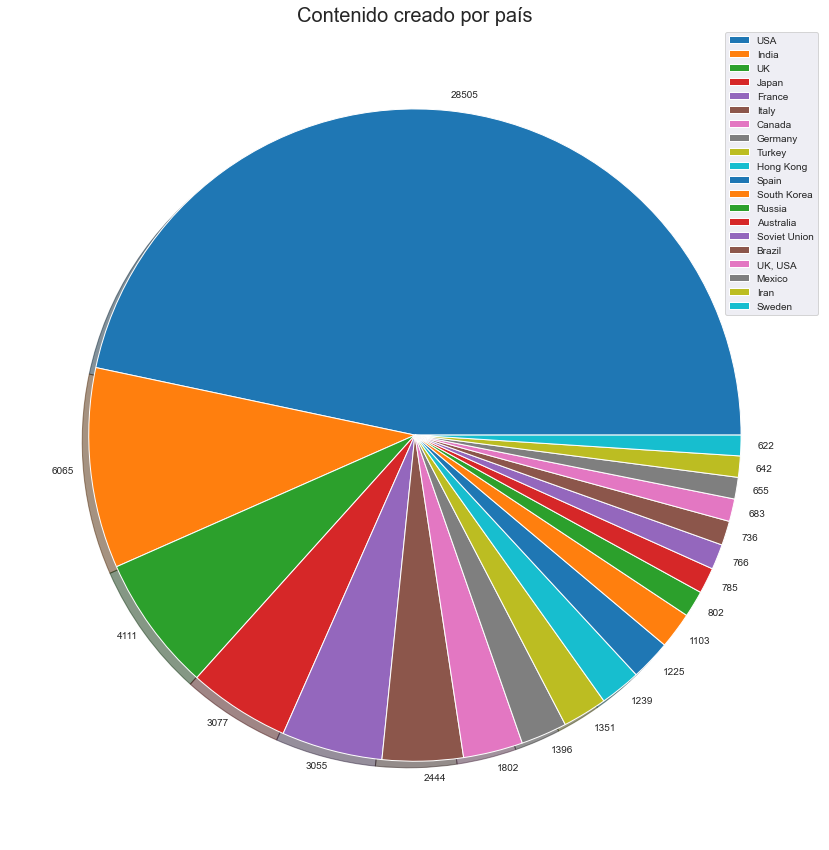

In [43]:
Paises = country.round(3).astype('str')

fig1, ax1 = plt.subplots(figsize=(20,15), facecolor='white')
ax1.pie(country, labels=Paises, labeldistance=1.05,
        shadow=True)
plt.title('Contenido creado por país', fontsize=20)
plt.legend(labels=country.index, loc='upper right')
plt.show()


In [44]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [45]:
Directores = Peliculas.director.value_counts().head(20)
Directores

Jesús Franco          87
Michael Curtiz        85
Lesley Selander       78
Lloyd Bacon           73
William Beaudine      70
Richard Thorpe        68
John Ford             67
Gordon Douglas        64
Raoul Walsh           61
Mervyn LeRoy          59
Cheh Chang            57
Norman Taurog         56
Giannis Dalianidis    56
Priyadarshan          55
Takashi Miike         55
Alfred E. Green       53
Joseph Kane           53
Carlo Vanzina         53
Jing Wong             52
William A. Seiter     52
Name: director, dtype: int64

<AxesSubplot:title={'center':'¿Que director ha producido más peliculas?'}>

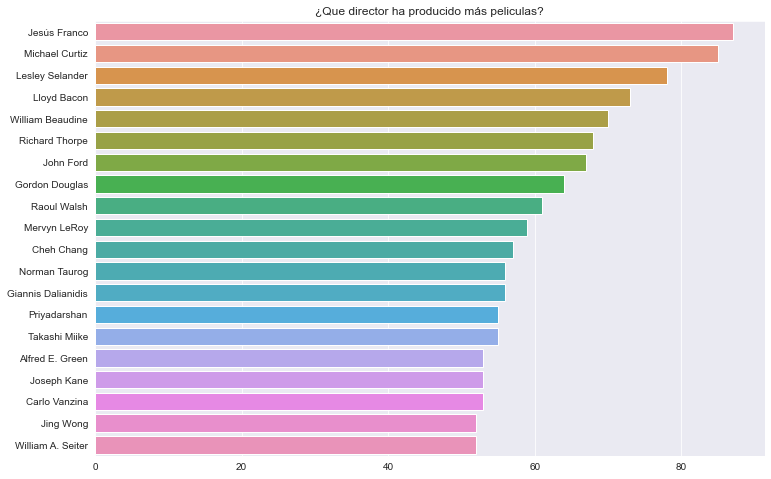

In [46]:
director = Peliculas.director.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que director ha producido más peliculas?')
sns.barplot(x=director.values, y=director.index)

In [47]:
writer = Peliculas.writer.value_counts().head(20)
writer

Jing Wong                                84
Kuang Ni                                 45
Woody Allen                              40
Erdogan Tünas                            35
Leonardo Benvenuti, Piero De Bernardi    34
Carlo Vanzina, Enrico Vanzina            32
Cheh Chang, Kuang Ni                     31
Giannis Dalianidis                       29
Ingmar Bergman                           27
Safa Önal                                27
William Shakespeare                      25
Agenore Incrocci, Furio Scarpelli        25
Ki-duk Kim                               24
Franco Castellano, Giuseppe Moccia       23
Sang-soo Hong                            23
Mario Amendola, Bruno Corbucci           23
Javed Akhtar, Javed Akhtar               23
Spede Pasanen                            22
Larry Cohen                              22
Sadik Sendil                             22
Name: writer, dtype: int64

<AxesSubplot:title={'center':'¿Quién ha escrito más guiones de peliculas?'}>

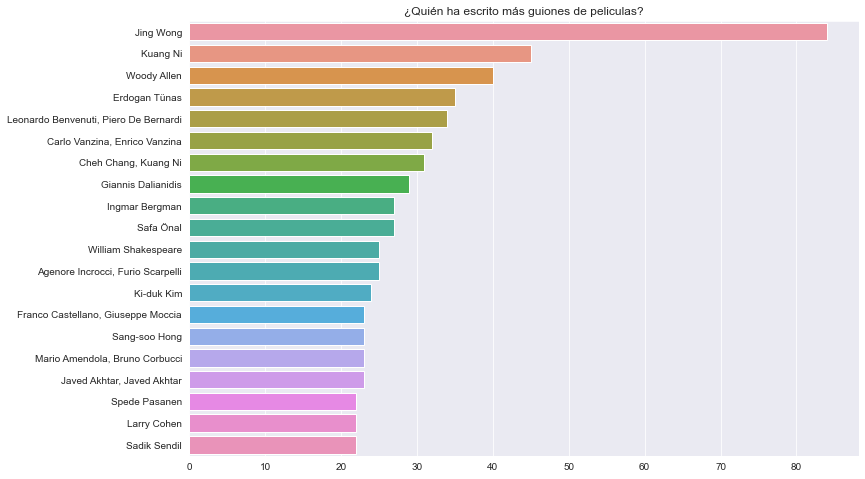

In [48]:
writer = Peliculas.writer.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Quién ha escrito más guiones de peliculas?')
sns.barplot(x=writer.values, y=writer.index)

In [49]:
MoreVotes = Peliculas.sort_values(by=['votes',"year"], ascending=False).head(25)
MoreVotes['worlwide_gross_income'] = MoreVotes['worlwide_gross_income'].str.replace('$', '')
MoreVotes["worlwide_gross_income"] = MoreVotes["worlwide_gross_income"].astype(int)
MoreVotes.dtypes

title                         object
year                          object
genre                         object
duration                       int64
country                       object
language                      object
director                      object
writer                        object
production_company            object
actors                        object
description                   object
avg_vote                     float64
votes                          int64
budget                        object
usa_gross_income              object
worlwide_gross_income          int64
metascore                    float64
reviews_from_users           float64
reviews_from_critics         float64
allgenders_0age_avg_vote     float64
allgenders_18age_avg_vote    float64
allgenders_30age_avg_vote    float64
allgenders_45age_avg_vote    float64
males_allages_avg_vote       float64
males_0age_avg_vote          float64
males_18age_avg_vote         float64
males_30age_avg_vote         float64
m

<AxesSubplot:xlabel='title'>

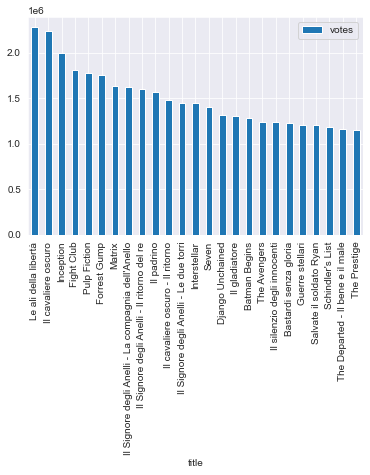

In [50]:
MoreVotes.plot(x="title", y="votes", kind="bar")

In [51]:
RMVI = Peliculas.sort_values(by=['votes',"year"], ascending=False).head(25)
RMVI['worlwide_gross_income'] = RMVI['worlwide_gross_income'].str.replace('$', '')
RMVI["worlwide_gross_income"] = RMVI["worlwide_gross_income"].astype(int)
RMVI.dtypes


title                         object
year                          object
genre                         object
duration                       int64
country                       object
language                      object
director                      object
writer                        object
production_company            object
actors                        object
description                   object
avg_vote                     float64
votes                          int64
budget                        object
usa_gross_income              object
worlwide_gross_income          int64
metascore                    float64
reviews_from_users           float64
reviews_from_critics         float64
allgenders_0age_avg_vote     float64
allgenders_18age_avg_vote    float64
allgenders_30age_avg_vote    float64
allgenders_45age_avg_vote    float64
males_allages_avg_vote       float64
males_0age_avg_vote          float64
males_18age_avg_vote         float64
males_30age_avg_vote         float64
m

<AxesSubplot:xlabel='title'>

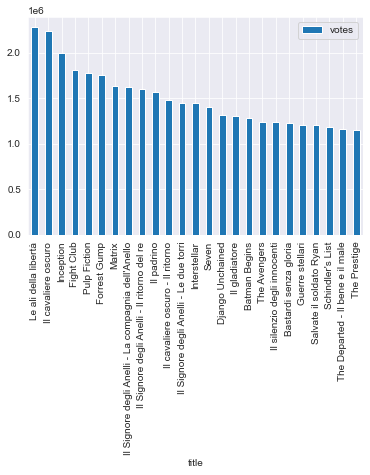

In [52]:
RMVI.plot(x="title", y="votes", kind="bar")

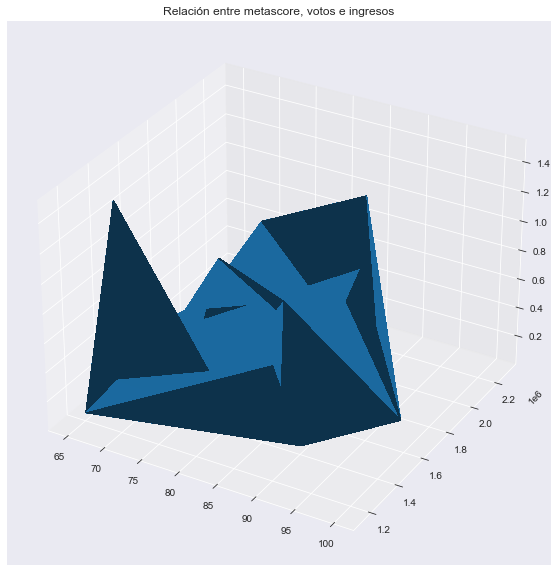

In [53]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

z = RMVI["worlwide_gross_income"]
x = RMVI["metascore"]
y = RMVI["votes"]
fig.set_figwidth(40)
fig.set_figheight(10)

ax.plot_trisurf(x,y,z ,linewidth=0, antialiased=False)
ax.set_title('Relación entre metascore, votos e ingresos')
plt.show()

Con esta grafica podemos ver que existe una relación entre Metascore, los votos y los ingresos, por lo que son variables relacionadas

Utilizo la copia del principio para volver a tener el dataframe como al principio y lo llamo Peliculas

In [54]:
Peliculas = Peliculascopy

In [55]:
worlwide = Peliculas.worlwide_gross_income.value_counts().head(20)
usa = Peliculas.usa_gross_income.value_counts().head(20)
title = Peliculas.title.value_counts().head(20)

In [56]:
usa
worlwide

$ 8144           15
$ 46808          10
$ 509             9
$ 97182           6
$ 14000000        5
$ 2874            5
$ 12000000        4
$ 11000000        4
INR 220000000     4
$ 1500000         4
$ 2248            4
$ 1142            3
$ 3891            3
INR 500000000     3
$ 3234            3
$ 5000            3
$ 205             3
$ 15245           3
$ 5633            3
$ 13793           3
Name: worlwide_gross_income, dtype: int64

<AxesSubplot:title={'center':'¿Que Peliculas recaudarón más en todo el mundo?'}>

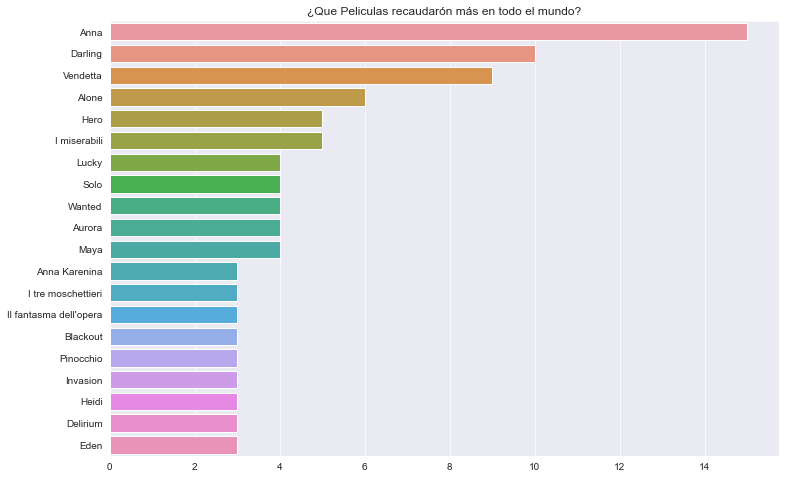

In [57]:
plt.figure(figsize=(12,8))
plt.title('¿Que Peliculas recaudarón más en todo el mundo?')
sns.barplot(x=worlwide.values, y=title.index)

<AxesSubplot:title={'center':'¿Que Peliculas recaudarón más EE.UU.?'}>

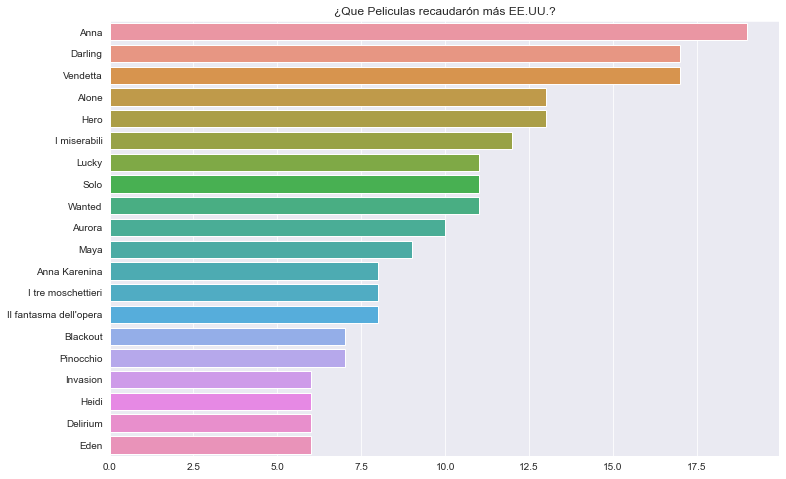

In [58]:
plt.figure(figsize=(12,8))
plt.title('¿Que Peliculas recaudarón más EE.UU.?')
sns.barplot(x=usa.values, y=title.index)

Como es obvio, los valores de recaudación a nivel mundial son mayores que la recaudación en USA, pero aunque los valores sean mayores, el orden de las peliculas que másrecaudan son los mismos

In [59]:
print("Cuales son los principales géneros de los 5 países con mayor número de películas")

Cuales son los principales géneros de los 5 países con mayor número de películas


In [60]:
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.2,7.0,5.9,5.6,6.7,6.0,7.3,5.9,5.7,4.5
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.1,6.0,6.2,6.0,6.2,6.2,NaN,5.9,6.2,6.6
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.9,NaN,5.5,5.9,6.2,5.7,NaN,5.8,5.8,6.8
3,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.1,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.0,8.0,7.0,7.0,7.0,7.2,7.0,7.0,7.3,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85841,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,5.3,6.0,5.6,5.3,5.2,6.0,NaN,6.2,5.7,5.0
85842,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.8,NaN,7.6,7.6,7.9,7.6,NaN,7.4,8.0,7.3
85843,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,6.0,NaN,1.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
85844,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,3.1,NaN,6.5,1.8,1.0,4.0,NaN,NaN,NaN,7.0


In [61]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [62]:
movies_genre = Peliculas[['title', 'genre', 'avg_vote']]

In [63]:
splitgenre = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['title']).stack()
splitgenre = splitgenre.reset_index(['title'])
splitgenre.columns = ['title', 'splitgenre']
genreofmovies = pd.merge(splitgenre, movies_genre[['title', 'avg_vote']],
                              left_on = 'title', right_on = 'title')
genreofmovies['splitgenre'] = genreofmovies['splitgenre'].str.lstrip(' ').str.rstrip(' ')

In [64]:
genreofmovies.head()

,title,splitgenre,avg_vote
0,Miss Jerry,Romance,5.9
1,The Story of the Kelly Gang,Biography,6.1
2,The Story of the Kelly Gang,Crime,6.1
3,The Story of the Kelly Gang,Drama,6.1
4,Den sorte drøm,Drama,5.8


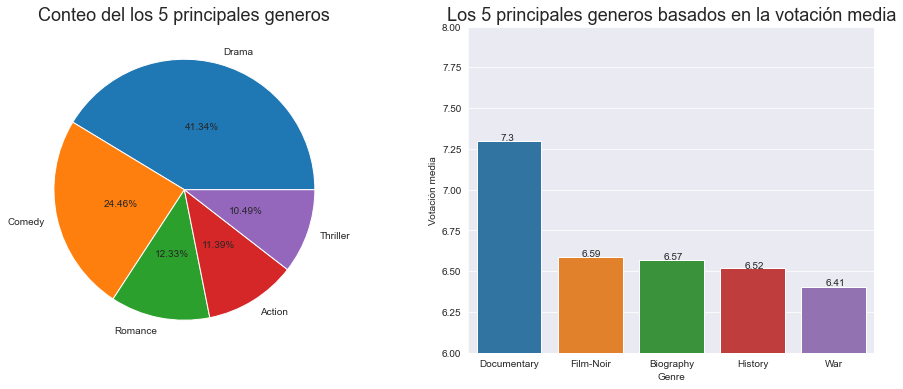

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))

genres = genreofmovies.groupby('splitgenre')['title'].count().sort_values(ascending = False).index[0:5]
count_movies = genreofmovies.groupby('splitgenre')['title'].count().sort_values(ascending = False)[0:5]
ax[0].pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5)
ax[0].set_title('Conteo del los 5 principales generos', fontsize = 18)

genres = genreofmovies.groupby('splitgenre')['avg_vote'].mean().sort_values(ascending = False).index[0:5]
avg_votes = genreofmovies.groupby('splitgenre')['avg_vote'].mean().sort_values(ascending = False)[0:5]
sns.barplot(ax = ax[1], x = genres, y = avg_votes)
ax[1].set_title('Los 5 principales generos basados en la votación media', fontsize = 18)
ax[1].set_xlabel('Genre')
for index,avg_votes in enumerate(round(avg_votes, 2)):
    ax[1].text(x=index-0.1 , y =avg_votes+0 , s=f"{avg_votes}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('Votación media')
ax[1].set_ylim(6, 8)

plt.show()

In [67]:
idiomatop = Peliculas.language.groupby(Peliculas.language).size().sort_values(ascending=False)[:10]
idiomatop = idiomatop.index
print(idiomatop)

Index(['English', 'French', 'Spanish', 'Japanese', 'Italian', 'Hindi',
       'German', 'Turkish', 'Russian', 'English, Spanish'],
      dtype='object', name='language')


In [68]:
Peliculas = Peliculas[Peliculas.language.isin(idiomatop)].reset_index(drop=True)
Peliculas.head()

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.1,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1
1,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.0,8.0,7.0,7.0,7.0,7.2,7.0,7.0,7.3,7.4
2,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",...,5.7,NaN,5.6,5.7,5.8,5.8,NaN,6.3,5.1,6.5
3,Madame DuBarry,1919,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),"Pola Negri, Emil Jannings, Harry Liedtke, Edua...",...,6.6,3.0,6.4,6.6,6.8,7.4,NaN,6.5,7.2,8.2
4,Quo Vadis?,1913,"Drama, History",120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",Società Italiana Cines,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...",...,6.2,6.0,5.8,6.2,6.3,6.3,NaN,6.5,6.3,6.2


In [73]:
def top_genres(Peliculas,dim):
    top_genres = pd.DataFrame()
    
    for i in Peliculas[dim].unique().tolist():
        #print(i)
        #print(df.genre[df.language==i])
        top_genres[i] = Peliculas.genre[Peliculas[dim]==i].head(10).tolist()
        #print(top_genres[i])
    return top_genres

In [74]:
top10_genre = Peliculas.groupby(by='genre').agg(No_of_films=('language','count')).sort_values(by='No_of_films',ascending=False)[:10]
top10_genre = top10_genre.index
top10_genre

Index(['Drama', 'Comedy', 'Comedy, Drama', 'Drama, Romance', 'Horror',
       'Comedy, Romance', 'Comedy, Drama, Romance', 'Horror, Thriller',
       'Thriller', 'Crime, Drama'],
      dtype='object', name='genre')

In [79]:
xx = Peliculas.groupby(by=['language','genre']).agg(no_of_films = ('genre','count')).reset_index()
genre_lang_table = xx[(xx.language.isin(idiomatop))].reset_index(drop=True)
genre_lang_table.sort_values(by=['language','no_of_films'],inplace=True,ascending=False)
genre_lang_table = top_genres(genre_lang_table,'language')
genre_lang_table

NameError: name 'idiomatop' is not defined

In [76]:
xx2 = xx[(xx.language.isin(idiomatop)) & (xx.genre.isin(top10_genre))]
xx2 = xx2.pivot(index='genre',columns='language')
xx2.loc['total']=xx2.sum(axis=0)
xx2.columns = xx2.columns.droplevel(0) #drop index level no_of_films
xx2['total'] = xx2.sum(axis=1)
xx2 = xx2 / xx2.loc['total']
xx2 = xx2.drop(axis=0,labels='total')
xx2.sort_values(by='total',ascending=False,inplace=True)
genre_lang_ratios = xx2.copy()
genre_lang_ratios

language,English,"English, Spanish",French,German,Hindi,Italian,Japanese,Russian,Spanish,Turkish,total
genre,,,,,,,,,,,
Drama,0.244456,0.223464,0.353222,0.353734,0.252825,0.232475,0.468953,0.375587,0.395962,0.365663,0.287570
Comedy,0.179348,0.125698,0.277645,0.275934,0.103107,0.459557,0.094532,0.264476,0.221537,0.267559,0.213932
"Comedy, Drama",0.092990,0.142458,0.123309,0.104772,0.135593,0.088077,0.094532,0.078247,0.123388,0.100334,0.100309
"Drama, Romance",0.081010,0.092179,0.072792,0.070539,0.203390,0.037747,0.113994,0.100156,0.057768,0.090301,0.081107
Horror,0.106753,0.061453,0.011933,0.022822,0.021186,0.041941,0.108434,0.018779,0.051598,0.042363,0.077738
"Comedy, Romance",0.069957,0.108939,0.045744,0.056017,0.091808,0.046135,0.021316,0.062598,0.048233,0.064660,0.062434
"Comedy, Drama, Romance",0.068459,0.136872,0.040175,0.052905,0.120056,0.027561,0.033364,0.029734,0.031969,0.027871,0.058009
"Horror, Thriller",0.064751,0.044693,0.003978,0.008299,0.012712,0.011384,0.012975,0.020344,0.019630,0.020067,0.042624
Thriller,0.052271,0.011173,0.023071,0.024896,0.033898,0.014979,0.013902,0.015649,0.031408,0.006689,0.038768


In [77]:
xtick = genre_lang_ratios.columns.tolist()

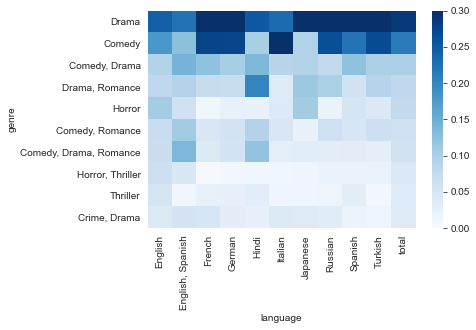

In [78]:
sns.heatmap(genre_lang_ratios,vmin=0,vmax=0.3,cmap='Blues',xticklabels=xtick)
plt.show()